In [292]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [293]:
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [294]:
bustime = pd.read_excel('C:/Users/admin/Desktop/WithU-HJ/data/운행계통.xlsx')
bustime.head()

,연번,노선번호,업체,기점,경유지,종점,상용대수\n(운행대수),Unnamed: 7,Unnamed: 8,예비대수,...,Unnamed: 12,배차간격,배차간격.1,배차간격.2,배차간격.3,운행횟수,운행횟수.1,운행횟수.2,운행횟수.3,첫차\n막차
0,NaN,NaN,NaN,NaN,NaN,NaN,평일,토요일,공휴일,NaN,...,휴식시간\n(분),평일\n첨두,평일\n비첨두,토요일\n첨두,공휴일\n첨두,평일\n1대당횟수,평일\n1일총횟수,토요일\n1일총횟수,공휴일\n1일총횟수,NaN
1,1,2,동원,다대포,하단,부산역,18,18,17,1.0,...,20,7,11,10,11,5.7,102,102,100,05:00\n22:15
2,2,3,동진,다대포,하단,신호주거\n단지,15,12,12,1.0,...,20,11,14,16,16,4.9,73,65,65,05:00\n21:50
3,3,5-1,삼성,회동동,서면,국제여객터미널,16,13,13,1.0,...,35,13,16,17,16,4.1,66,57,61,04:50\n22:20
4,4,6,남부,청학동,남포동,괴정,20,17,15,1.0,...,20,5,8,9,11,6.2,123,106,93,04:50\n22:45


In [295]:
bustime = bustime[['노선번호', '배차간격', '배차간격.1', '배차간격.2', '배차간격.3', '운행횟수.1', '운행횟수.2', '운행횟수.3', '운행거리(km)']]
bustime.head()

,노선번호,배차간격,배차간격.1,배차간격.2,배차간격.3,운행횟수.1,운행횟수.2,운행횟수.3,운행거리(km)
0,NaN,평일\n첨두,평일\n비첨두,토요일\n첨두,공휴일\n첨두,평일\n1일총횟수,토요일\n1일총횟수,공휴일\n1일총횟수,NaN
1,2,7,11,10,11,102,102,100,39.8
2,3,11,14,16,16,73,65,65,49.3
3,5-1,13,16,17,16,66,57,61,56.1
4,6,5,8,9,11,123,106,93,38.3


In [296]:
bustime = bustime.rename(columns = {'배차간격' : '평일출퇴근' , '배차간격.1' : '평일', '배차간격.2': '토요일출퇴근', '배차간격.3' : '공휴일출퇴근', '운행횟수.1' : '평일 1일 총 운행횟수', '운행횟수.2' : '토요일 1일 총 운행횟수', '운행횟수.3' : '공휴일 1일 총 운행횟수'})
bustime

,노선번호,평일출퇴근,평일,토요일출퇴근,공휴일출퇴근,평일 1일 총 운행횟수,토요일 1일 총 운행횟수,공휴일 1일 총 운행횟수,운행거리(km)
0,NaN,평일\n첨두,평일\n비첨두,토요일\n첨두,공휴일\n첨두,평일\n1일총횟수,토요일\n1일총횟수,공휴일\n1일총횟수,NaN
1,2,7,11,10,11,102,102,100,39.8
2,3,11,14,16,16,73,65,65,49.3
3,5-1,13,16,17,16,66,57,61,56.1
4,6,5,8,9,11,123,106,93,38.3
...,...,...,...,...,...,...,...,...,...
180,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,2000,25,25,25,25,20,20,20,110.0


In [297]:
bustime = bustime.drop(index=0, axis=0)
bustime.head()

,노선번호,평일출퇴근,평일,토요일출퇴근,공휴일출퇴근,평일 1일 총 운행횟수,토요일 1일 총 운행횟수,공휴일 1일 총 운행횟수,운행거리(km)
1,2,7,11,10,11,102,102,100,39.8
2,3,11,14,16,16,73,65,65,49.3
3,5-1,13,16,17,16,66,57,61,56.1
4,6,5,8,9,11,123,106,93,38.3
5,7,12,15,17,18,63,58,51,30.7


In [298]:
bustime = bustime.dropna(axis=0)
bustime = bustime.reset_index(drop=True)
bustime

,노선번호,평일출퇴근,평일,토요일출퇴근,공휴일출퇴근,평일 1일 총 운행횟수,토요일 1일 총 운행횟수,공휴일 1일 총 운행횟수,운행거리(km)
0,2,7,11,10,11,102,102,100,39.8
1,3,11,14,16,16,73,65,65,49.3
2,5-1,13,16,17,16,66,57,61,56.1
3,6,5,8,9,11,123,106,93,38.3
4,7,12,15,17,18,63,58,51,30.7
...,...,...,...,...,...,...,...,...,...
141,1008,14,14,14,15,72,72,67,72.5
142,1009,40,48,50,50,19,18,18,107.0
143,1010,9,13,13,15,74.6,74.6,65.6,68.0
144,1011,15,30,30,30,41,41,41,97.0


In [299]:
bustime['평균 배차간격'] = 0

for i in range(len(bustime)):
    bustime['평균 배차간격'][i] = (bustime['평일출퇴근'][i] + bustime['평일'][i] + bustime['토요일출퇴근'][i] + bustime['공휴일출퇴근'][i])/4
bustime

C:\Users\admin\AppData\Local\Temp\ipykernel_13560\1491759077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bustime['평균 배차간격'][i] = (bustime['평일출퇴근'][i] + bustime['평일'][i] + bustime['토요일출퇴근'][i] + bustime['공휴일출퇴근'][i])/4


,노선번호,평일출퇴근,평일,토요일출퇴근,공휴일출퇴근,평일 1일 총 운행횟수,토요일 1일 총 운행횟수,공휴일 1일 총 운행횟수,운행거리(km),평균 배차간격
0,2,7,11,10,11,102,102,100,39.8,9.75
1,3,11,14,16,16,73,65,65,49.3,14.25
2,5-1,13,16,17,16,66,57,61,56.1,15.50
3,6,5,8,9,11,123,106,93,38.3,8.25
4,7,12,15,17,18,63,58,51,30.7,15.50
...,...,...,...,...,...,...,...,...,...,...
141,1008,14,14,14,15,72,72,67,72.5,14.25
142,1009,40,48,50,50,19,18,18,107.0,47.00
143,1010,9,13,13,15,74.6,74.6,65.6,68.0,12.50
144,1011,15,30,30,30,41,41,41,97.0,26.25


In [301]:
bustime['평균 운행횟수'] = 0

for i in range(len(bustime)):
    bustime['평균 운행횟수'][i] = (bustime['평일 1일 총 운행횟수'][i] + bustime['토요일 1일 총 운행횟수'][i] + bustime['공휴일 1일 총 운행횟수'][i])/3
bustime

C:\Users\admin\AppData\Local\Temp\ipykernel_13560\2979528044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bustime['평균 운행횟수'][i] = (bustime['평일 1일 총 운행횟수'][i] + bustime['토요일 1일 총 운행횟수'][i] + bustime['공휴일 1일 총 운행횟수'][i])/3


,노선번호,평일출퇴근,평일,토요일출퇴근,공휴일출퇴근,평일 1일 총 운행횟수,토요일 1일 총 운행횟수,공휴일 1일 총 운행횟수,운행거리(km),평균 배차간격,평균 운행횟수
0,2,7,11,10,11,102,102,100,39.8,9.75,101.333333
1,3,11,14,16,16,73,65,65,49.3,14.25,67.666667
2,5-1,13,16,17,16,66,57,61,56.1,15.50,61.333333
3,6,5,8,9,11,123,106,93,38.3,8.25,107.333333
4,7,12,15,17,18,63,58,51,30.7,15.50,57.333333
...,...,...,...,...,...,...,...,...,...,...,...
141,1008,14,14,14,15,72,72,67,72.5,14.25,70.333333
142,1009,40,48,50,50,19,18,18,107.0,47.00,18.333333
143,1010,9,13,13,15,74.6,74.6,65.6,68.0,12.50,71.600000
144,1011,15,30,30,30,41,41,41,97.0,26.25,41.000000


In [302]:
bustime = bustime.set_index('노선번호')
bustime

,평일출퇴근,평일,토요일출퇴근,공휴일출퇴근,평일 1일 총 운행횟수,토요일 1일 총 운행횟수,공휴일 1일 총 운행횟수,운행거리(km),평균 배차간격,평균 운행횟수
노선번호,,,,,,,,,,
2,7,11,10,11,102,102,100,39.8,9.75,101.333333
3,11,14,16,16,73,65,65,49.3,14.25,67.666667
5-1,13,16,17,16,66,57,61,56.1,15.50,61.333333
6,5,8,9,11,123,106,93,38.3,8.25,107.333333
7,12,15,17,18,63,58,51,30.7,15.50,57.333333
...,...,...,...,...,...,...,...,...,...,...
1008,14,14,14,15,72,72,67,72.5,14.25,70.333333
1009,40,48,50,50,19,18,18,107.0,47.00,18.333333
1010,9,13,13,15,74.6,74.6,65.6,68.0,12.50,71.600000


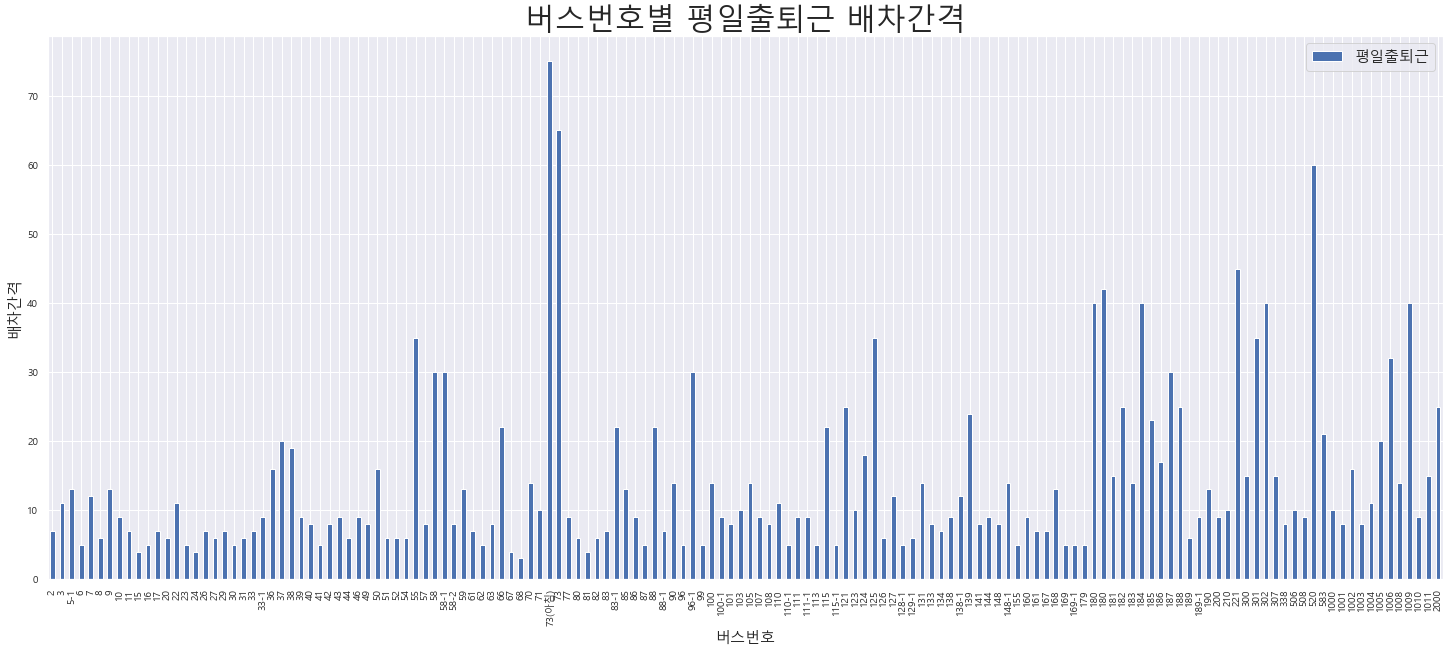

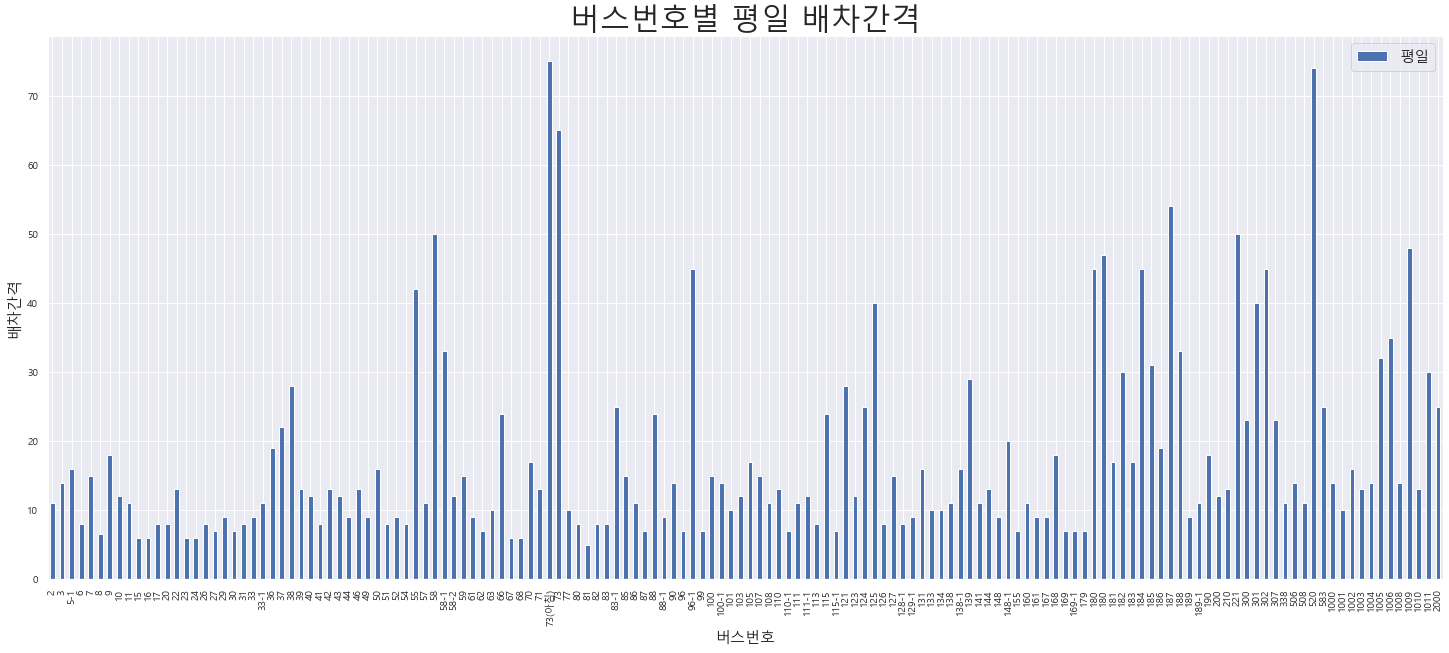

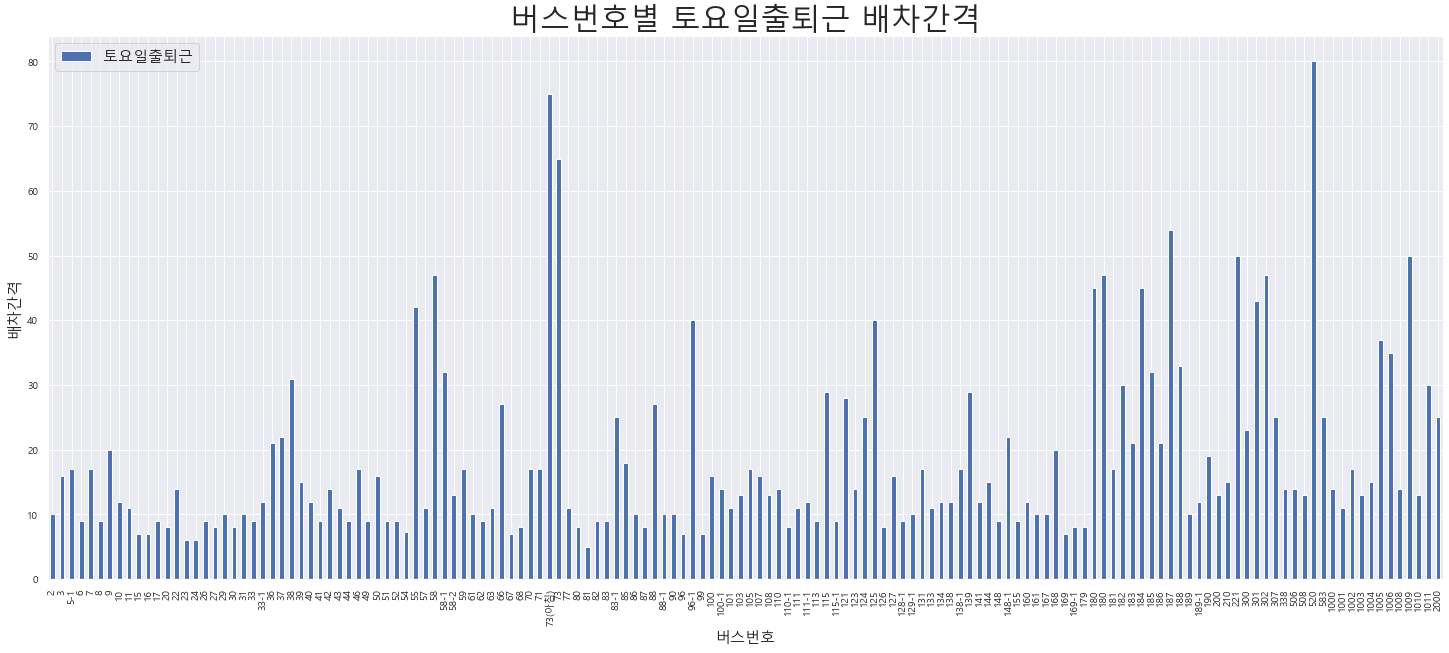

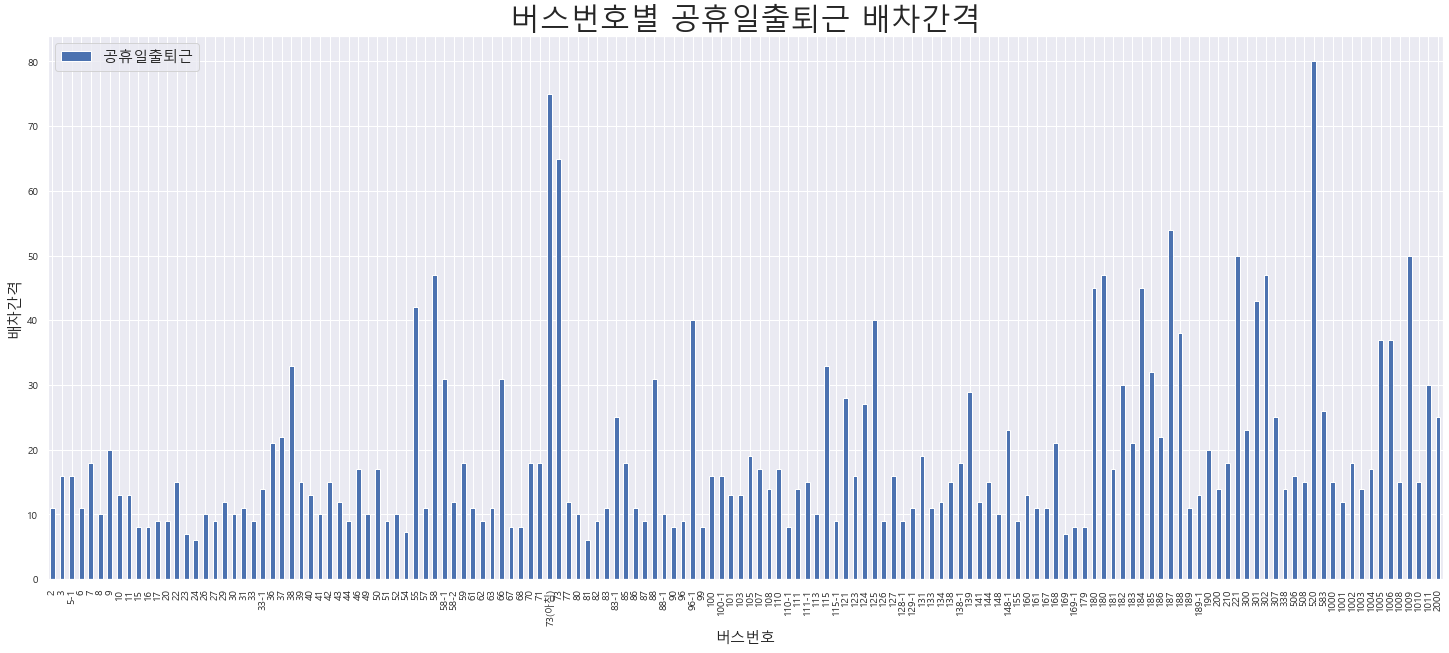

In [303]:
for i in range(0, 4):
    interval = bustime[[bustime.columns[i]]]
    plt.rcParams['figure.figsize'] = (25,10)
    interval.plot(kind='bar')
    plt.title(f'버스번호별 {bustime.columns[i]} 배차간격', fontsize=30)
    plt.xlabel('버스번호', fontsize=15)
    plt.ylabel('배차간격', fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend([f'{bustime.columns[i]}'], fontsize=15)
    plt.show()

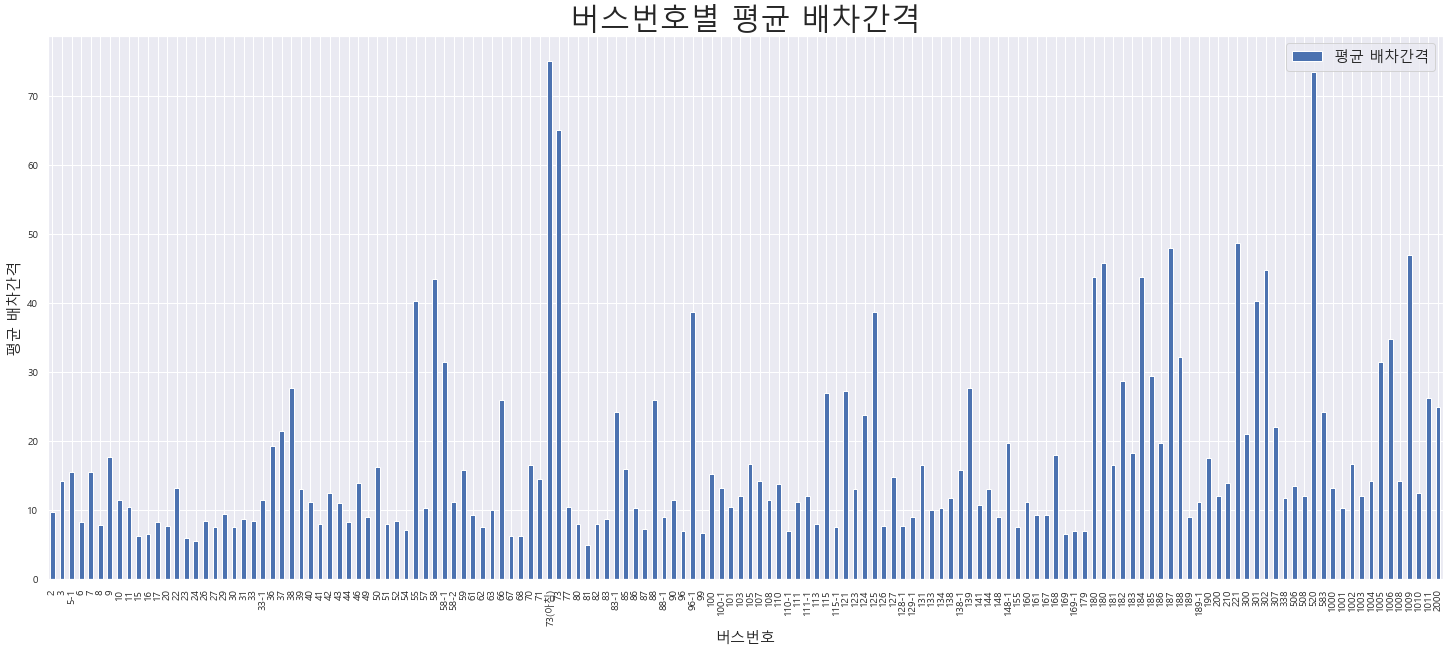

In [304]:
interval = bustime[['평균 배차간격']]
plt.rcParams['figure.figsize'] = (25,10)
interval.plot(kind='bar')
plt.title(f'버스번호별 평균 배차간격', fontsize=30)
plt.xlabel('버스번호', fontsize=15)
plt.ylabel('평균 배차간격', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['평균 배차간격'], fontsize=15)
plt.show()

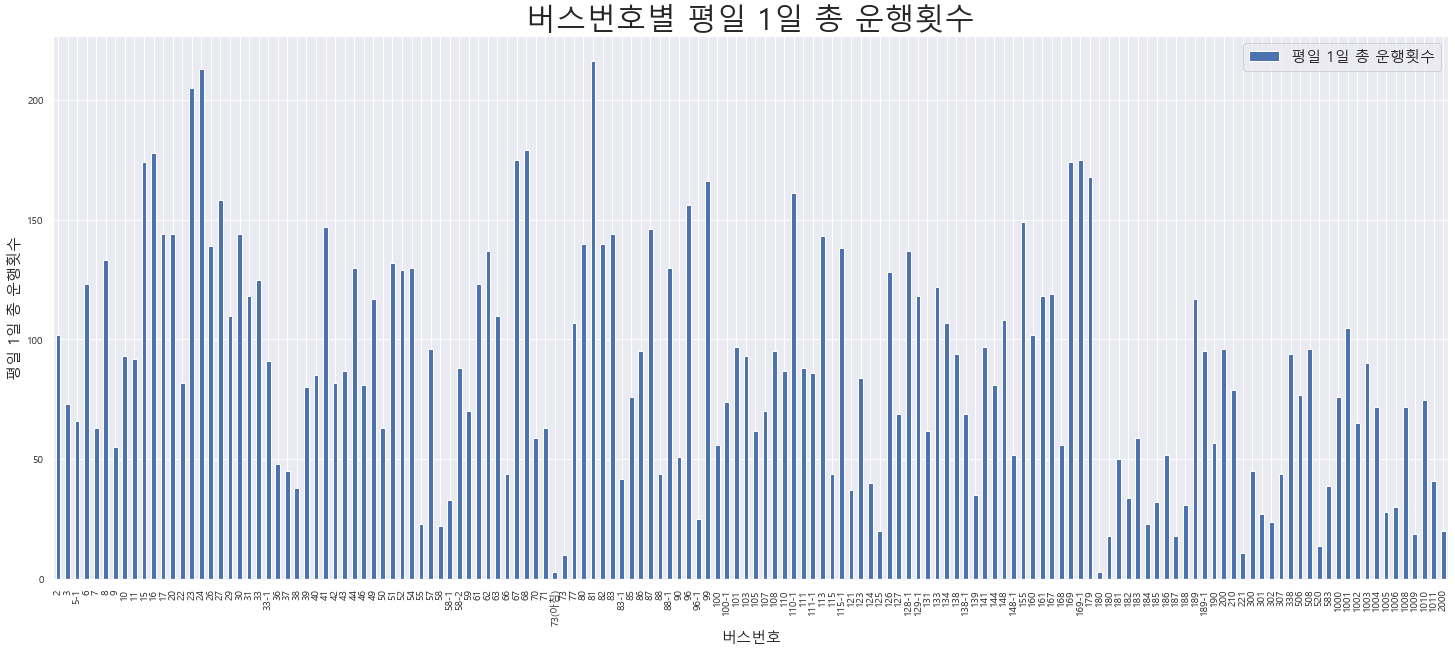

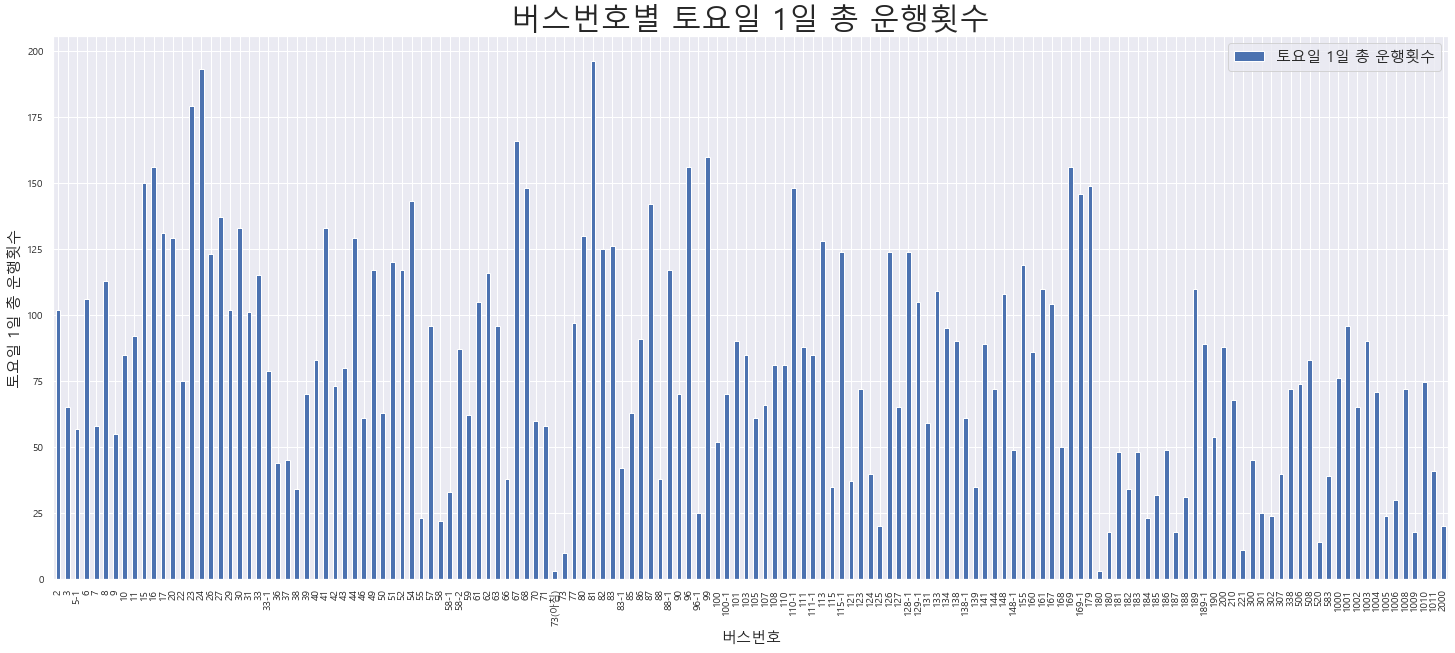

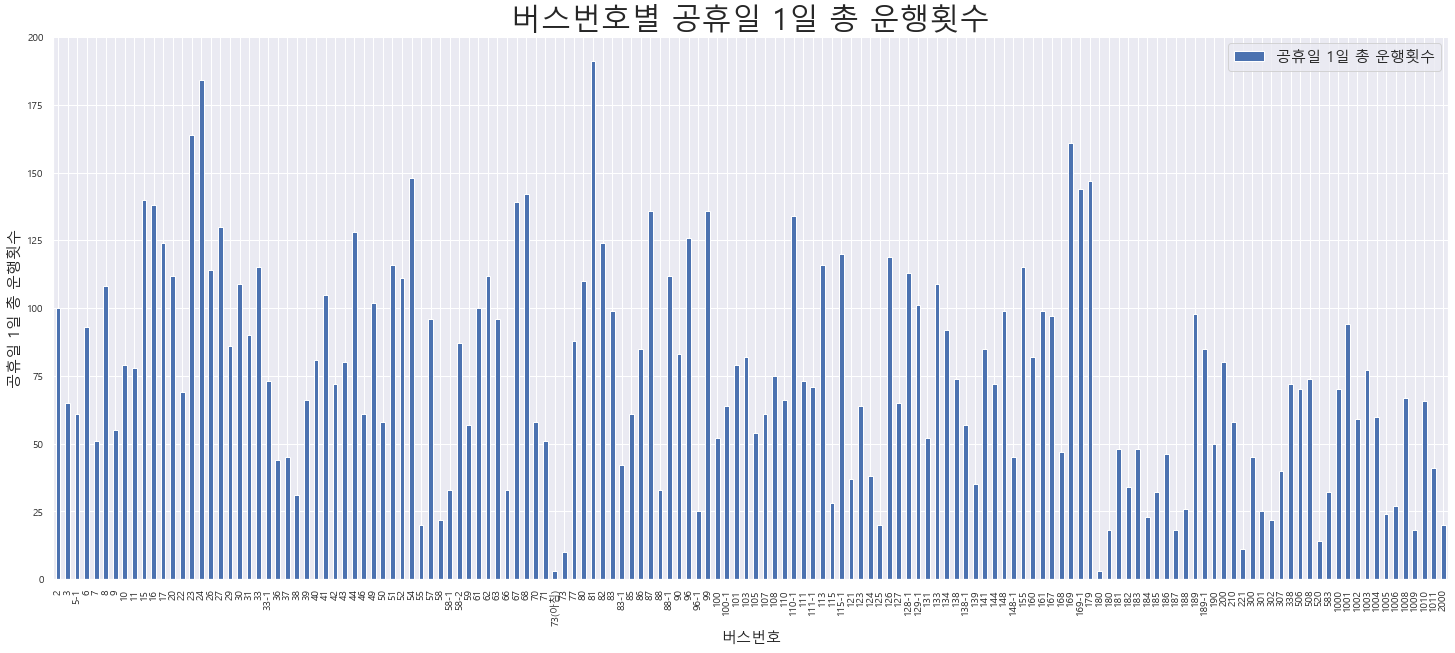

In [305]:
for i in range(4, 7):
    cnt = bustime[[bustime.columns[i]]]
    plt.rcParams['figure.figsize'] = (25,10)
    cnt.plot(kind='bar')
    plt.title(f'버스번호별 {bustime.columns[i]}', fontsize=30)
    plt.xlabel('버스번호', fontsize=15)
    plt.ylabel(f'{bustime.columns[i]}', fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend([f'{bustime.columns[i]}'], fontsize=15)
    plt.show()

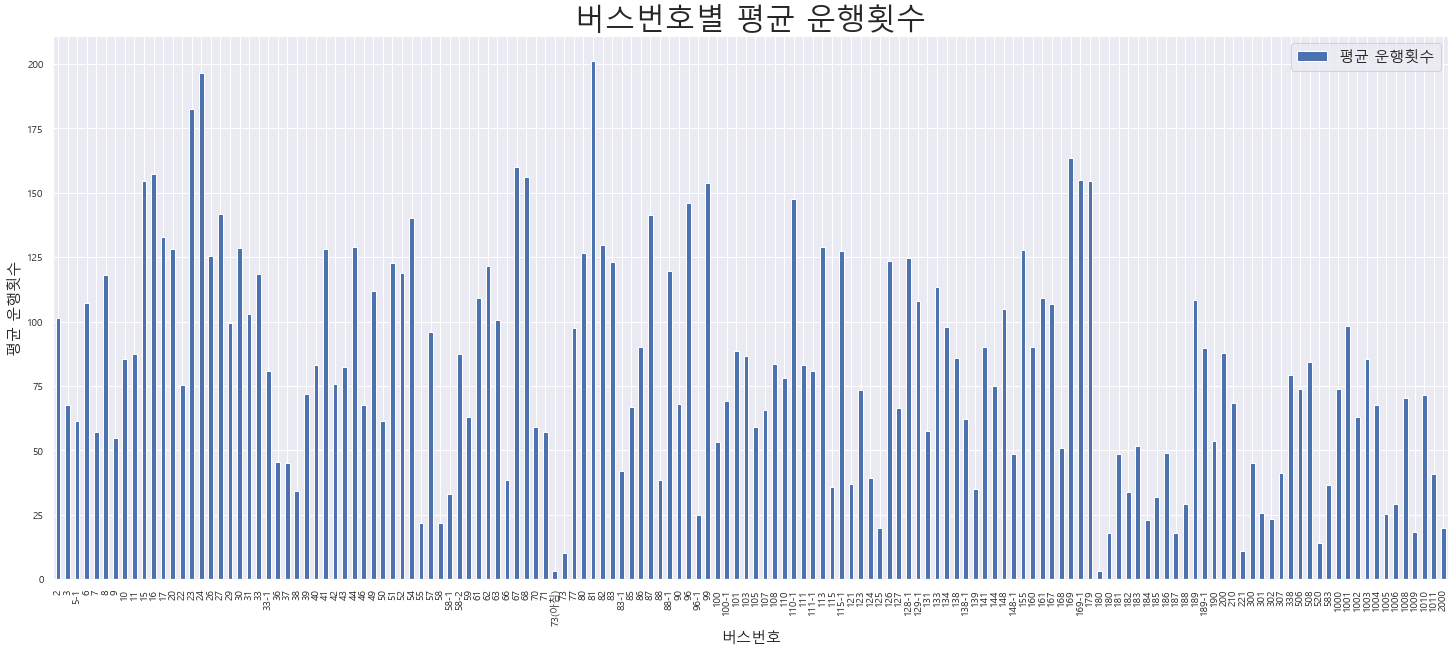

In [306]:
cnt = bustime[['평균 운행횟수']]
plt.rcParams['figure.figsize'] = (25,10)
cnt.plot(kind='bar')
plt.title(f'버스번호별 평균 운행횟수', fontsize=30)
plt.xlabel('버스번호', fontsize=15)
plt.ylabel('평균 운행횟수', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['평균 운행횟수'], fontsize=15)
plt.show()

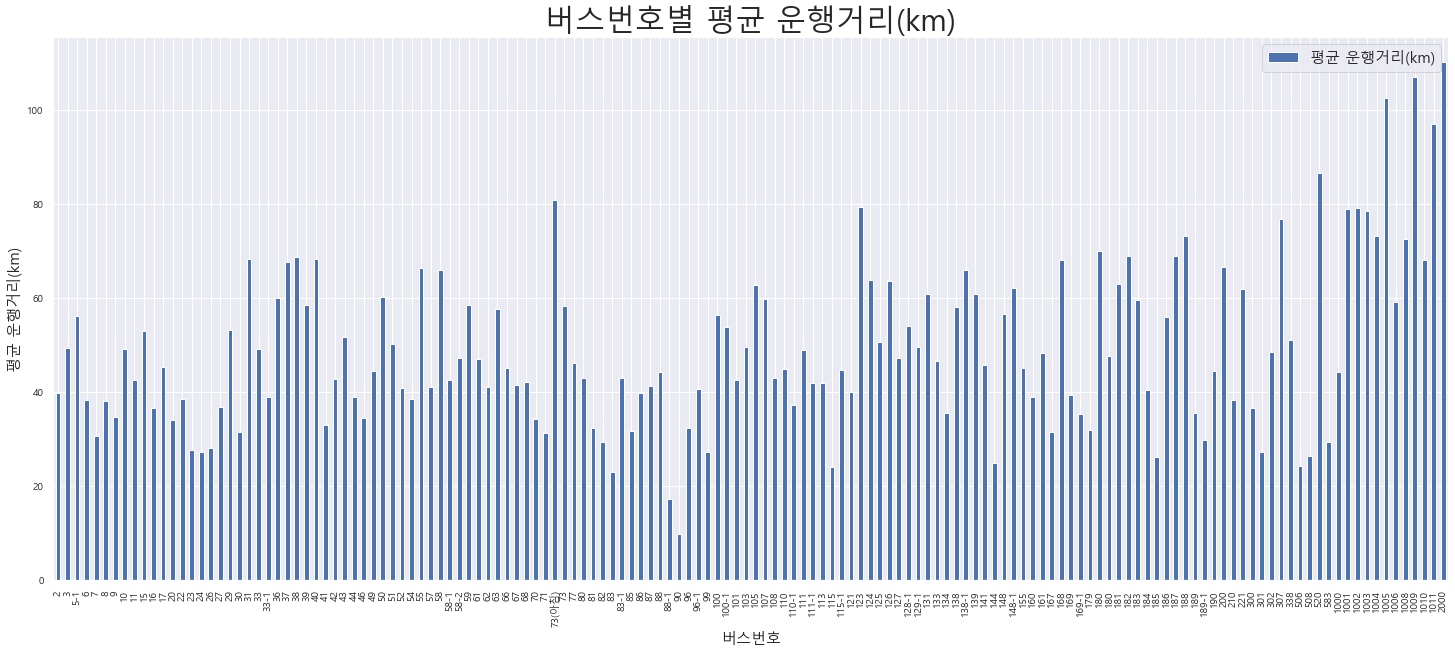

In [307]:
cnt = bustime[['운행거리(km)']]
plt.rcParams['figure.figsize'] = (25,10)
cnt.plot(kind='bar')
plt.title(f'버스번호별 평균 운행거리(km)', fontsize=30)
plt.xlabel('버스번호', fontsize=15)
plt.ylabel('평균 운행거리(km)', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['평균 운행거리(km)'], fontsize=15)
plt.show()

In [ ]:
bustime['평균 배차간격'].describe()

count    146.000000
mean      17.185078
std       13.117869
min        5.000000
25%        8.812500
50%       12.000000
75%       19.625000
max       75.000000
Name: 평균 배차간격, dtype: float64

In [ ]:
bustime['평균 운행횟수'].describe()

count    146.000000
mean      81.606849
std       43.354631
min        3.000000
25%       48.666667
50%       78.666667
75%      113.000000
max      201.000000
Name: 평균 운행횟수, dtype: float64

In [308]:
bustime['운행거리(km)'].describe()

count    146.000000
mean      49.220548
std       17.532307
min        9.800000
25%       38.075000
50%       45.150000
75%       59.950000
max      110.000000
Name: 운행거리(km), dtype: float64

In [ ]:
bustime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 2 to 2000
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   평일출퇴근       146 non-null    object 
 1   평일          146 non-null    object 
 2   토요일출퇴근      146 non-null    object 
 3   공휴일출퇴근      146 non-null    object 
 4   평일1일총운행횟수   146 non-null    object 
 5   토요일1일총운행횟수  146 non-null    object 
 6   공휴일1일총운행횟수  146 non-null    object 
 7   운행거리(km)    146 non-null    float64
 8   평균 배차간격     146 non-null    float64
 9   평균 운행횟수     146 non-null    float64
dtypes: float64(3), object(7)
memory usage: 12.5+ KB


In [ ]:
bustime_corr = bustime.corr()
bustime_corr

,운행거리(km),평균 배차간격,평균 운행횟수
운행거리(km),1.000000,0.422561,-0.469840
평균 배차간격,0.422561,1.000000,-0.789771
평균 운행횟수,-0.469840,-0.789771,1.000000


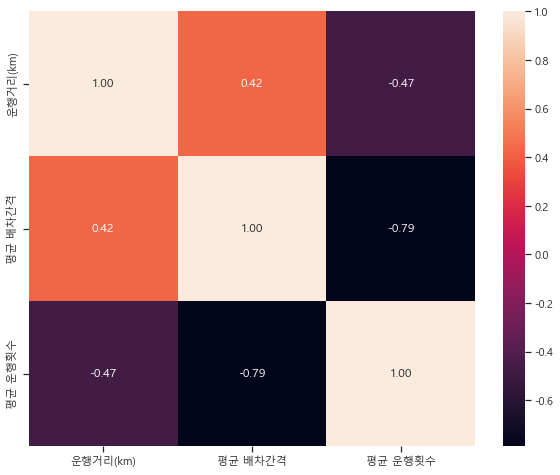

In [ ]:
sns.heatmap(bustime_corr, annot=True, fmt='.2f')
plt.rcParams['figure.figsize'] = (8,5)